

# Project: Investigate the NoshowAppointment data set to determine what factors affect patients show up rate for appointments at different hospitals

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">data cleaning </a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset focuses on the issue of whether or not people show up for their hospital appointment and includes data from 100k medical appointments in Brazil. Each row contains information about a different patient trait.


<h1> Understanding the table variables </h1>
1) PatientId     - is used to identify a patient.
2) AppointmentID - is the what is used identify an appointment made. 
3) Gendern       - The patient's gender (Female or Male).
4) ScheduledDay  - The field reveals the day the patient scheduled their appointment.
5) AppointmentDay - The day of the patient's real appointment that is when they must see the doctor. 
6) Age            - The age of the patient
7)  Neighbourhood  - designates the area where the hospital is.
8) Scholarship    -  denotes whether or not the patient is a participant in Bolsa Familia, a welfare program in Brazil (0 for no & 1 for Yes).
9) Hipertension   - denotes the presence or absence of hypertension in a patient is indicated by their  (0 for no & 1 for Yes).
10) Diabetes       - denotes the presence or absence of diabetes in a patient is indicated by their  (0 for no & 1 for Yes).
11) Alcoholism     - denotes whether the patient suffers from alcoholism or not (0 for no & 1 for Yes).
12) Handcap	       - Denotes if a patients is handicap or not (0 for no & 1 for Yes).
13) SMS_received   - Denotes whether the patient received an SMS by looking at SMS received (0 for no & 1 for Yes)
14) No-show        - Whether or not a patient showed up for their appointment is indicated by the term "no-show" (Yes for didn't show, No for show).

<h2> Questions to answer </h2>

1. what is the showup rate verses non showup rate of each neighbour.
2. How does the sms affect show up rate.
3. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
4. How likely will non-schoolarship recipient received an sms and showup for an appointment
5. How does waiting time affect  showup rate
6. Are younger patients(<40) or older (>40) with diabeties and Hipertension likely to showup for an appointment?
7. What is the probability that a handicap patient will show up for appointments.
8. What is the probability that a patient who suffers from alcoholism will show up for an appointment without receiving an sms.



In [38]:
#import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [39]:
#Understanding how my data set looks like 
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [40]:
# checking the number of samples and columns 
df_appointments.shape


(110527, 14)

In [41]:
# understanding the descriptive statistics
df_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [42]:
#Check for data type of each column
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [43]:
#checking for duplicates
df_appointments.duplicated().sum()

0

In [44]:
#Checking for missing data
df_appointments.isna().sum().sum()

0

In [45]:
#Checking of there exist any negative age
abnormal_age = df_appointments.query('Age<0')

In [46]:
abnormal_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning 
From understanding the data, we can see that:
1. The formating of the column labels are not consistent so we will need to rename everything to small letters for easy accessing.
2. We can see the age column has a negative value so we need to replace it by the mean of this column. Because its surely a mistake
3. Dropping the patientId and appointmentId as its not necessary for my calculations

In [47]:
#Dropping the patientId and appointmentId as its not necessary for my calculations
df_appointments = df_appointments.drop(['PatientId', 'AppointmentID'], axis = 1)

In [48]:
#checking if the 2 columns are remove successfully, since there not important in my analysis process
df_appointments.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [49]:
#Formating the columns labels
df_appointments.rename(columns = lambda x: x.lower(), inplace = True)



In [50]:
df_appointments

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [51]:
#Replacing the negative age with the mean of the age column
the_mean_age = df_appointments['age'].mean()

df_appointments.loc[99832, 'age'] = the_mean_age

In [52]:
#Repeat the code to check. 
df_appointments.loc[99832, 'age']

37.08887421173107

In [53]:

df_appointments.drop(df_appointments.index[df_appointments['handcap'] > 1], inplace=True)

In [54]:
df_appointments.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
mean,37.070753,0.098280,0.196831,0.071605,0.030382,0.018508,0.321179
std,23.097947,0.297694,0.397606,0.257833,0.171637,0.134781,0.466931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
#change the data type of scheduledday and appointmentday 
df_appointments['scheduledday'] = pd.to_datetime(df_appointments['scheduledday'])
df_appointments['appointmentday'] = pd.to_datetime(df_appointments['appointmentday'])

In [56]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110328 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110328 non-null  object             
 1   scheduledday    110328 non-null  datetime64[ns, UTC]
 2   appointmentday  110328 non-null  datetime64[ns, UTC]
 3   age             110328 non-null  float64            
 4   neighbourhood   110328 non-null  object             
 5   scholarship     110328 non-null  int64              
 6   hipertension    110328 non-null  int64              
 7   diabetes        110328 non-null  int64              
 8   alcoholism      110328 non-null  int64              
 9   handcap         110328 non-null  int64              
 10  sms_received    110328 non-null  int64              
 11  no-show         110328 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(6), object(3)
memory usage:

In [57]:

# we are using dt.date to access the values of these 2 columns as datetime and returns a numpy array. 
(df_appointments['scheduledday'].dt.date > df_appointments['appointmentday'].dt.date).sum()

5

In [58]:
#drop the wrong scheduleing
indexes_to_drop = df_appointments[(df_appointments['scheduledday'].dt.date > df_appointments['appointmentday'].dt.date)].index
df_appointments.drop(indexes_to_drop, axis = 0, inplace = True)

In [59]:
(df_appointments['scheduledday'].dt.date > df_appointments['appointmentday'].dt.date).sum()

0

In [60]:
df_appointments.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [61]:
df_showedup = df_appointments[df_appointments['no-show'] == 'No'].copy()
df_showedup.rename(columns= {'no-show': 'showed_up'}, inplace = True)


In [62]:
df_showedup['showed_up'].replace('No', 1, inplace = True)

In [63]:
df_showedup

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.0,MARIA ORTIZ,0,0,0,0,0,1,1
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.0,MARIA ORTIZ,0,0,0,0,0,1,1
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.0,MARIA ORTIZ,0,0,0,0,0,1,1
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.0,MARIA ORTIZ,0,0,0,0,0,1,1


In [64]:
df_not_showedup = df_appointments[df_appointments['no-show'] == 'Yes'].copy()
df_not_showedup.rename(columns= {'no-show': 'not_showed_up'}, inplace = True)


In [65]:
df_not_showedup['not_showed_up'].replace('Yes', 0, inplace = True)

In [66]:
df_not_showedup

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,not_showed_up
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,0,0,0,0,0
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29.0,NOVA PALESTINA,0,0,0,0,0,1,0
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40.0,CONQUISTA,1,0,0,0,0,0,0
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30.0,NOVA PALESTINA,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45.0,BARRO VERMELHO,0,0,0,0,0,0,0
110492,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33.0,MARIA ORTIZ,0,1,0,0,0,0,0
110496,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37.0,MARIA ORTIZ,0,1,0,0,0,0,0
110515,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33.0,MARIA ORTIZ,0,1,0,0,0,0,0


In [ ]:
df_showedup.info()


## Exploratory Data Analysis


In [31]:
#So we will visual and focusing on the data set of those who showup to see which factors have a strong 

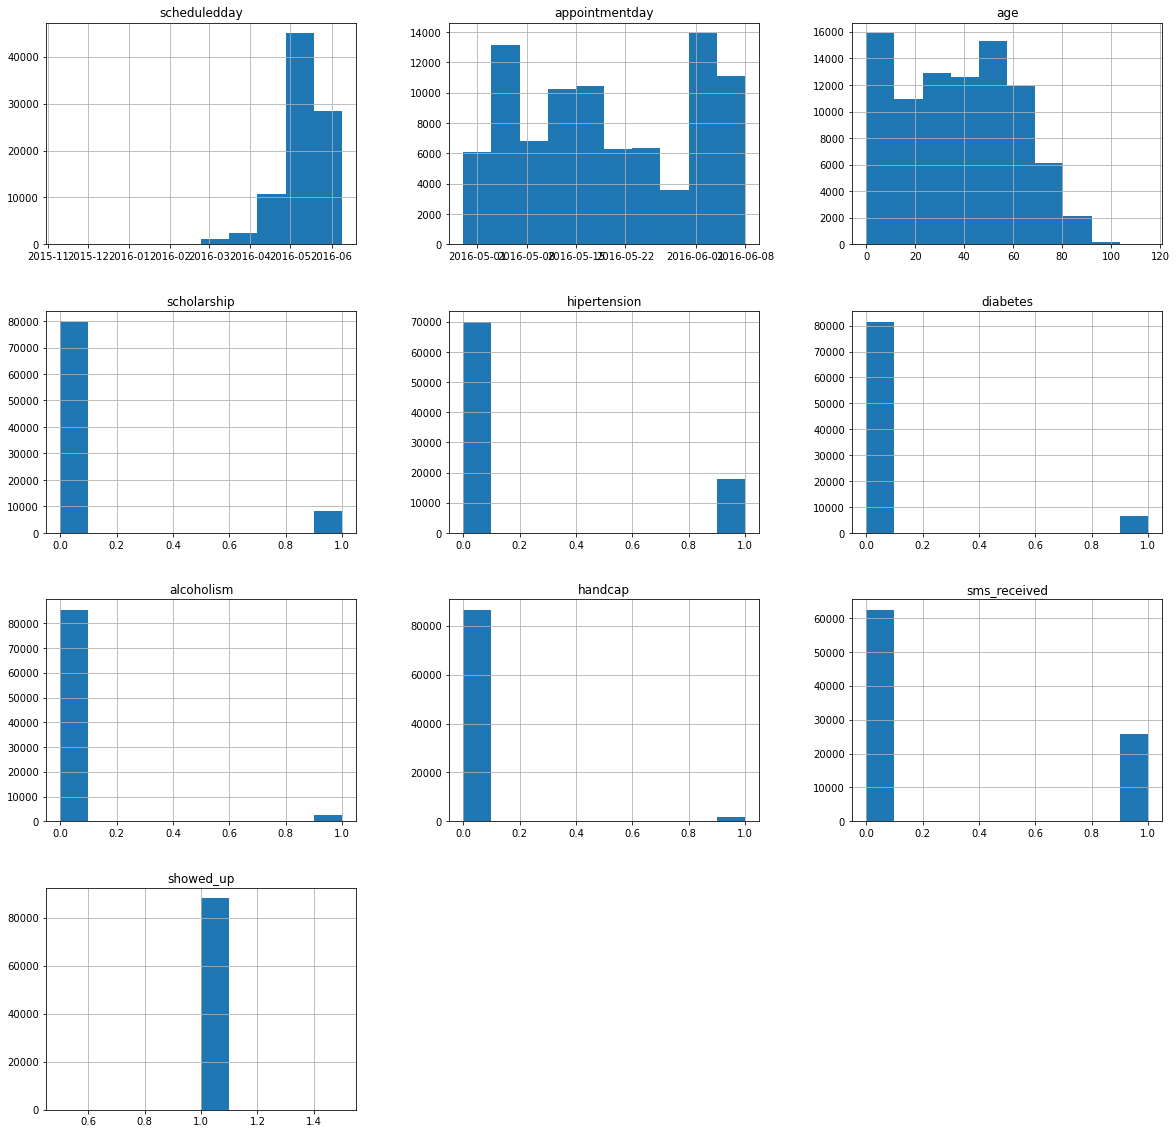

In [32]:

df_showedup.hist(figsize=(20,20) );

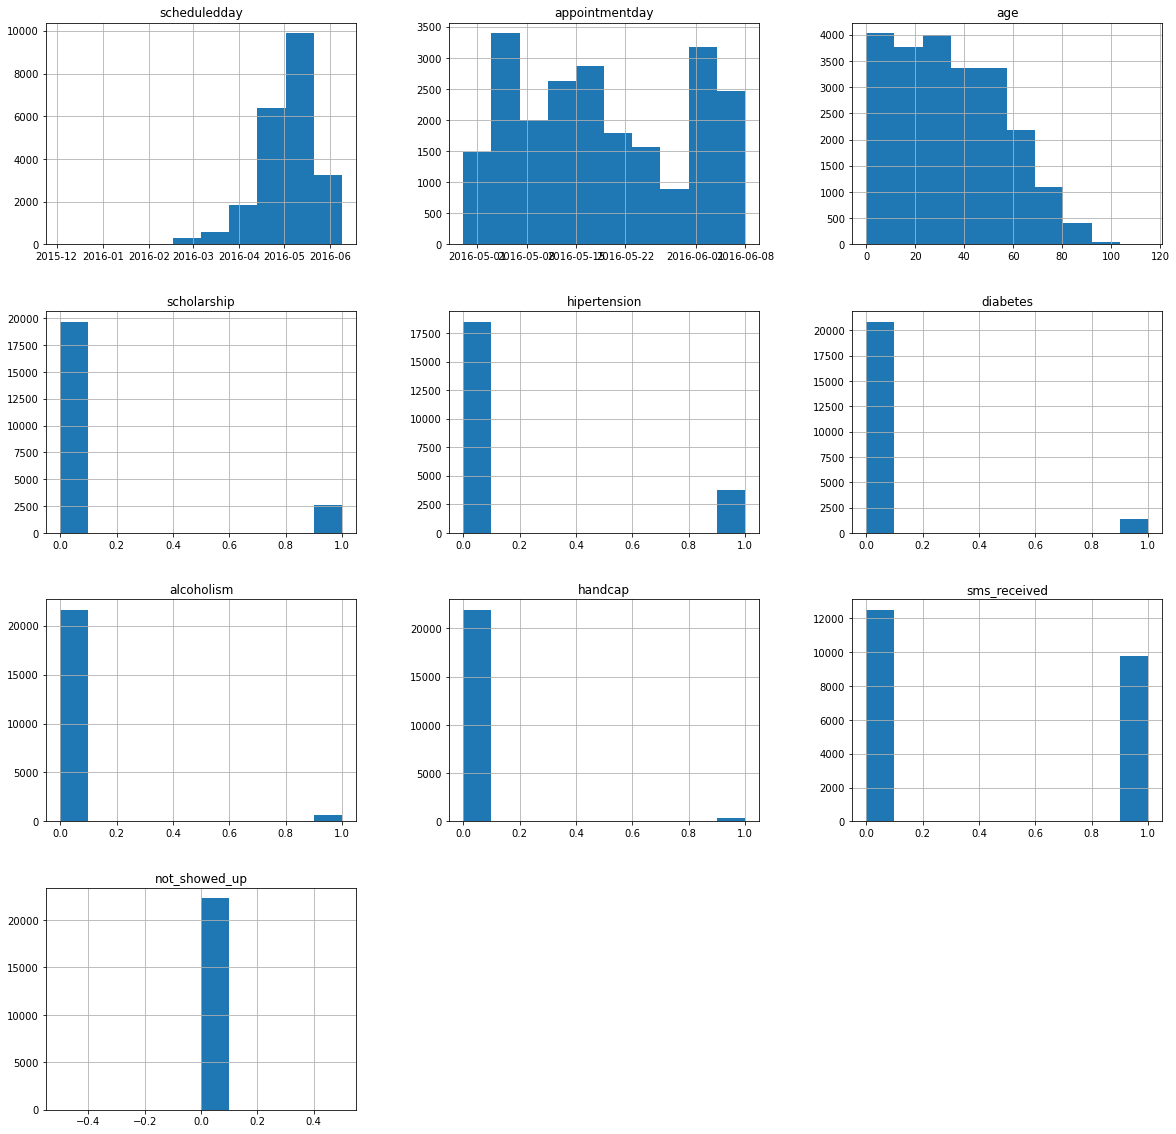

In [33]:
df_not_showedup.hist(figsize=(20,20) );

# Research question 1: What is the show up rate versus no show rate

In [34]:
#We will used the initial data set to plot this. 
df_rate = df_appointments['no-show'].value_counts().rename_axis('Came_or_Not'). reset_index(name= 'counts')

In [35]:
df_rate 

,Came_or_Not,counts
0,No,88050
1,Yes,22273


In [36]:
#Function is used to plot our pie chart everytime. 
def plotpie(values, labels, explode):
    figure = plt.figure()
    plt.pie(values, labels = p_Labels, autopct = '%1.2f%%', explode = p_explode)
    plt.show;

In [37]:
#Analysing to see if the show up rate is generally greater or less than the no show up rate.
#by defining the elements of the pie chart
# We are using pie chart because it shows the proportion of a category in a data as a percentage of total number. 
# This pie chart is going to show to us the percentage occupy by those who showed and percentage of those who didn't show up
#Call our plotpie function and visualised the data

plotpie(df_rate['counts'],["came", "didn't come"],[0, 0.1],  )
plotpie.legend(patches, labels, loc="best")

NameError: name 'p_Labels' is not defined

<Figure size 432x288 with 0 Axes>

# Research question2: How does sms reception affect show_up rate

In [2600]:
#we will see how someone recieving a remainder sms can affect them showing up. 
#With this we can know if we should add more afford to send out remainders through sms or not. 
sms_rate1 = df_showedup['sms_received'].sum()
sms_rate2 = df_not_showedup['sms_received'].sum()

In [2601]:
sms_rate1

25660

In [2602]:
sms_rate2

9775

In [2603]:
label = [ "showedup after recieving an sms",  "didnot showedup and recieved an sms"]
p_values2 = (sms_rate1, sms_rate2)
p_explode = [0.03, 0.03]

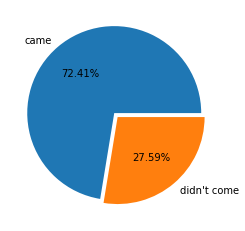

In [2604]:

plotpie(p_values2, label, explode = p_explode)

# Research question3: How does having a scholarship affect the show-rate?

In [2605]:
#This question will helped us understand whether people not showing up is because they can't afford or they don't want to simple come. 
scholarship_rate1 = df_showedup['scholarship'].value_counts().rename_axis('received/not').reset_index(name= 'counts')
scholarship_rate2 = df_not_showedup['scholarship'].value_counts().rename_axis('received/not').reset_index(name= 'counts')

In [2606]:

scholarship_rate  = scholarship_rate.assign(variable=['showedup without scholarship', 'showedup and having scholarship', 
'didnot showedup and no scholarship', 'didnot showedup and have scholarship'])



In [2607]:
scholarship_rate1

,received/not,counts
0,0,79784
1,1,8266


In [2608]:
scholarship_rate 

,received/not,counts,variable
0,0,79925,showedup without scholarship
1,1,8283,showedup and having scholarship
0,0,19736,didnot showedup and no scholarship
1,1,2578,didnot showedup and have scholarship


In [2609]:
label = ['showedup without scholarship', 'showedup and having scholarship', 
'didnot showedup and no scholarship', 'didnot showedup and have scholarship']
p_values = (scholarship_rate['counts'])
p_explode = [0.03, 0.03, 0.03, 0.03]

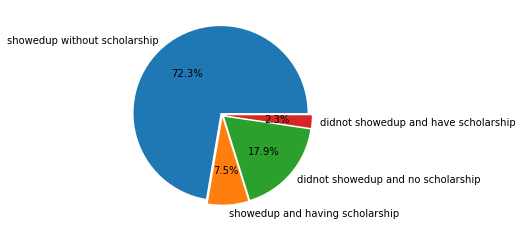

In [2610]:


plt.pie(p_values,labels =label, autopct = '%1.1f%%', explode = p_explode);


In [2611]:
#Getting the people  showedup and having scholarship 
scholarship_rate3 = df_showedup['scholarship'].sum()

In [2612]:
#Getting the people who didnot showedup and have scholarship
scholarship_rate4 = df_not_showedup['scholarship'].sum()

In [2613]:
#setting up varaibles for the plot
p_values3 = (scholarship_rate3, scholarship_rate4)
labels = ['showedup and having scholarship', 'didnot showedup and have scholarship']


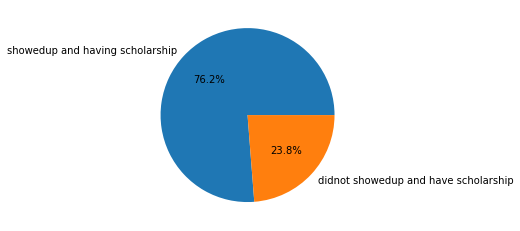

In [2614]:

plt.pie(p_values3,labels =labels, autopct = '%1.1f%%');




# How does Age affect show up rate

In [2615]:
df_showedup.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
count,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.0
mean,37.777082,0.093878,0.204066,0.073572,0.030403,0.019035,0.291425,1.0
std,23.330223,0.291661,0.403020,0.261074,0.171695,0.136647,0.454422,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [2616]:

df_showedup['age'] += 0.001

In [2617]:
# This groups the ages into different categories
df_showedup['Age Groups'] = pd.qcut(df_showedup['age'], 7)

In [2618]:
df_showedup

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,Age Groups
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.001,JARDIM DA PENHA,0,1,0,0,0,0,1,"(54.001, 64.001]"
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.001,JARDIM DA PENHA,0,0,0,0,0,0,1,"(54.001, 64.001]"
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.001,MATA DA PRAIA,0,0,0,0,0,0,1,"(54.001, 64.001]"
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.001,PONTAL DE CAMBURI,0,0,0,0,0,0,1,"(0.0, 8.001]"
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.001,JARDIM DA PENHA,0,1,1,0,0,0,1,"(54.001, 64.001]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(54.001, 64.001]"
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(44.001, 54.001]"
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(8.001, 21.001]"
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(33.001, 44.001]"


In [2619]:
#Counting the number times each category appeared. 
age_count =  pd.value_counts(df_showedup['Age Groups']).rename_axis('age_ranges').reset_index(name= 'counts')


In [2620]:
age_count

,age_ranges,counts
0,"(0.0, 8.001]",12974
1,"(8.001, 21.001]",12830
2,"(21.001, 33.001]",12740
3,"(44.001, 54.001]",12619
4,"(33.001, 44.001]",12578
5,"(54.001, 64.001]",12181
6,"(64.001, 115.001]",12128


In [2621]:
age_count  = age_count.assign(name_ranges=['Enfant', 'teen', 
'aldult', 'late_youth','youth', 'old', 'very_old'])

In [2622]:
age_count

,age_ranges,counts,name_ranges
0,"(0.0, 8.001]",12974,Enfant
1,"(8.001, 21.001]",12830,teen
2,"(21.001, 33.001]",12740,aldult
3,"(44.001, 54.001]",12619,late_youth
4,"(33.001, 44.001]",12578,youth
5,"(54.001, 64.001]",12181,old
6,"(64.001, 115.001]",12128,very_old


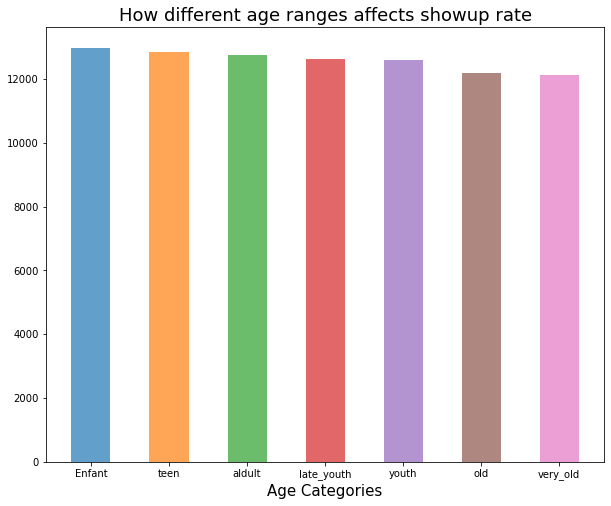

In [2623]:

name_ranges = ['Enfant', 'teen', 'aldult', 'late_youth','youth', 'old', 'very_old']
heights = age_count['counts']
width=0.5
plt.figure(figsize=(10,8))
plt.bar(name_ranges, heights,width,color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'], alpha = .7)
plt.xlabel("age_ranges",fontsize=15, color="k")
plt.xlabel("Age Categories",fontsize=15, color="k")
plt.title("How different age ranges affects showup rate", fontsize=18, color="k") 
plt.show();

# How does waiting days affect show-rate

In [2624]:
df_showedup.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,Age Groups
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.001,JARDIM DA PENHA,0,1,0,0,0,0,1,"(54.001, 64.001]"
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.001,JARDIM DA PENHA,0,0,0,0,0,0,1,"(54.001, 64.001]"
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.001,MATA DA PRAIA,0,0,0,0,0,0,1,"(54.001, 64.001]"
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.001,PONTAL DE CAMBURI,0,0,0,0,0,0,1,"(0.0, 8.001]"
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.001,JARDIM DA PENHA,0,1,1,0,0,0,1,"(54.001, 64.001]"


In [2625]:
#Getting the waiting timee each patient spends before going for an appoinment. 
waiting_time =df_showedup['appointmentday'] - df_showedup['scheduledday']

In [2626]:
 df_showedup['waiting_time'] = waiting_time

In [2627]:
df_showedup

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,Age Groups,waiting_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.001,JARDIM DA PENHA,0,1,0,0,0,0,1,"(54.001, 64.001]",-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.001,JARDIM DA PENHA,0,0,0,0,0,0,1,"(54.001, 64.001]",-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.001,MATA DA PRAIA,0,0,0,0,0,0,1,"(54.001, 64.001]",-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.001,PONTAL DE CAMBURI,0,0,0,0,0,0,1,"(0.0, 8.001]",-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.001,JARDIM DA PENHA,0,1,1,0,0,0,1,"(54.001, 64.001]",-1 days +07:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(54.001, 64.001]",34 days 14:44:25
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(44.001, 54.001]",34 days 16:32:27
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(8.001, 21.001]",40 days 07:56:08
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(33.001, 44.001]",40 days 08:50:37


In [2628]:
df_showedup['waiting_time']= df_showedup['waiting_time'].astype(str)


In [2629]:
#Splitting the column into 2, and extracting the waiting daysbefore each appoinment.
df_showedup[['days','remaining_time']] = df_showedup['waiting_time'].str.split(pat='days',expand=True)

In [2630]:
df_showedup

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,Age Groups,waiting_time,days,remaining_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.001,JARDIM DA PENHA,0,1,0,0,0,0,1,"(54.001, 64.001]",-1 days +05:21:52,-1,+05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.001,JARDIM DA PENHA,0,0,0,0,0,0,1,"(54.001, 64.001]",-1 days +07:51:33,-1,+07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.001,MATA DA PRAIA,0,0,0,0,0,0,1,"(54.001, 64.001]",-1 days +07:40:56,-1,+07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.001,PONTAL DE CAMBURI,0,0,0,0,0,0,1,"(0.0, 8.001]",-1 days +06:30:29,-1,+06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.001,JARDIM DA PENHA,0,1,1,0,0,0,1,"(54.001, 64.001]",-1 days +07:52:37,-1,+07:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(54.001, 64.001]",34 days 14:44:25,34,14:44:25
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(44.001, 54.001]",34 days 16:32:27,34,16:32:27
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(8.001, 21.001]",40 days 07:56:08,40,07:56:08
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(33.001, 44.001]",40 days 08:50:37,40,08:50:37


In [2631]:
df_showedup['days'].describe()

count     88050
unique      124
top         -1 
freq      36698
Name: days, dtype: object

In [2632]:
df_showedup['days'] = df_showedup['days'].astype(float)

In [2633]:
#Droping all negative waiting schedules. 
df_showedup = df_showedup.drop(df_showedup.index[df_showedup['days'] < 0])


In [2634]:
df_showedup

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,Age Groups,waiting_time,days,remaining_time
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76.001,REPÚBLICA,0,1,0,0,0,0,1,"(64.001, 115.001]",1 days 15:23:09,1.0,15:23:09
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19.001,CONQUISTA,0,0,0,0,0,0,1,"(8.001, 21.001]",1 days 11:11:35,1.0,11:11:35
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30.001,NOVA PALESTINA,0,0,0,0,0,0,1,"(21.001, 33.001]",1 days 09:01:49,1.0,09:01:49
12,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22.001,NOVA PALESTINA,1,0,0,0,0,0,1,"(21.001, 33.001]",0 days 12:26:09,0.0,12:26:09
13,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28.001,NOVA PALESTINA,0,0,0,0,0,0,1,"(21.001, 33.001]",0 days 09:07:53,0.0,09:07:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(54.001, 64.001]",34 days 14:44:25,34.0,14:44:25
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(44.001, 54.001]",34 days 16:32:27,34.0,16:32:27
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(8.001, 21.001]",40 days 07:56:08,40.0,07:56:08
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.001,MARIA ORTIZ,0,0,0,0,0,1,1,"(33.001, 44.001]",40 days 08:50:37,40.0,08:50:37


In [2635]:

df_showedup['days']= df_showedup['days'].astype(str)

In [2636]:
df_showedup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51352 entries, 5 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   gender          51352 non-null  object             
 1   scheduledday    51352 non-null  datetime64[ns, UTC]
 2   appointmentday  51352 non-null  datetime64[ns, UTC]
 3   age             51352 non-null  float64            
 4   neighbourhood   51352 non-null  object             
 5   scholarship     51352 non-null  int64              
 6   hipertension    51352 non-null  int64              
 7   diabetes        51352 non-null  int64              
 8   alcoholism      51352 non-null  int64              
 9   handcap         51352 non-null  int64              
 10  sms_received    51352 non-null  int64              
 11  showed_up       51352 non-null  int64              
 12  Age Groups      51352 non-null  category           
 13  waiting_time    51352 non-null

In [2637]:
#value count for each waiting day.
days = df_showedup['days'].value_counts().rename_axis('no_days').reset_index(name= 'counts')

In [2638]:
days

,no_days,counts
0,1.0,5115
1,0.0,4094
2,3.0,4050
3,6.0,3595
4,5.0,3030
...,...,...
118,81.0,1
119,126.0,1
120,124.0,1
121,116.0,1


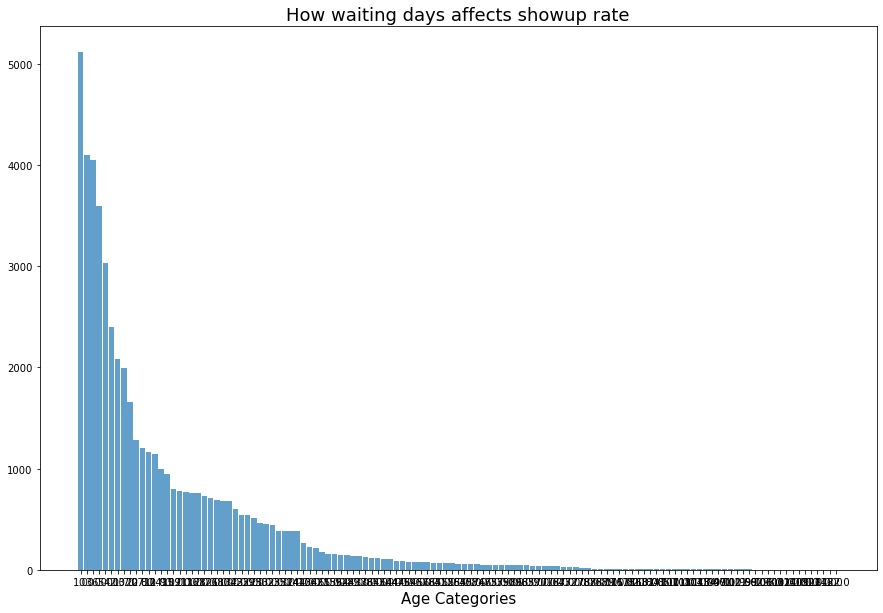

In [2639]:
name_ranges = days['no_days']
heights = days['counts']
width=0.9
plt.figure(figsize=(15,10))
plt.bar( name_ranges, heights,width, alpha = .7)
plt.xlabel("age_ranges",fontsize=15, color="k")
plt.xlabel("Age Categories",fontsize=15, color="k")
plt.title("How waiting days affects showup rate", fontsize=18, color="k") 
plt.show();

<a id='conclusions'></a>
## Conclusions



# Limitation

In [ ]:
References: 
- https://github.com/MohamedAteya/Project-Investigate-the-No-showappointments-Data-Udacity-Data-Analysis-ND
- https://datascienceparichay.com/article/pandas-delete-rows-based-on-column-values/